<a href="https://colab.research.google.com/github/renatabmagro/RNA_DuracaoCicloMacieira/blob/main/RNA_DuracaoCiclo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script para implementação de uma rede neural artificial do tipo Multilayer Perceptron para a previsão da duração do ciclo produtivo da macieira a partir de dados meteorológicos.

> Para construir esse código foram utilizados dados meteorológicos + as datas de início da floração e de ínicio da colheita da macieira; ou seja, considerou-se o **ciclo produtivo** como sendo correspondente ao período entre o início da floração e o início da colheita. 

> A planilha contendo os dados necessários para rodar este script pode ser encontrada em: C:\Users\Luciano-PC2\Desktop\Renata_2022\03. Rstudio\Dados\Dados_extra

>> Para comparar o desempenho de diferentes redes neurais, realizou-se a experimentação de:

  * RNA com 1 camada interna;
  * RNA com 3 camadas internas. 

>> Um passo anterior a implementação da RNA foi a análise de correlação entre as variáveis para definir as entrada da rede. Com base nos resultados da análise de correlação, foram selecionadas como variáveis de entrada (inputs): 

*   Temperatura máxima
*   Temperatura mínima 
* Temperatura média 
* Radiação solar 
* Graus-dia
* Graus-dia acumulado 

OBS: os dados meteorológicos são referentes ao período **2008-2022**.

>> A variável de saída (output) corresponde à duração do ciclo (em dias julianos)






In [10]:
# Instalação das bibliotecas
install.packages("readxl")
library(readxl)
install.packages("tidyr")
install.packages("tidyverse")
library(tidyr)
library(tidyverse)
install.packages("dplyr")
library(dplyr)
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [30]:
# Leitura dos dados 
dados_fen = read_excel("BancoDadosFen3.xlsx")

# Visualização dados
head(dados_fen)
tail(dados_fen)

data,Tmax,Tmin,Tmed,Precip,Rsolar,GD,GDacum,Dciclo,DiasJul,Dciclo2
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2008-09-15,9.254167,7.583333,8.418750,0.0,24.0859,0.0000000,0.0000000,259,2008259,1
2008-09-16,9.554167,8.241667,8.897917,0.0,24.0380,0.0000000,0.0000000,260,2008260,2
2008-09-17,10.437500,8.975000,9.706250,0.0,24.1843,0.1308761,0.1308761,261,2008261,3
2008-09-18,10.695833,9.016667,9.856250,0.0,24.7821,0.2883478,0.4192239,262,2008262,4
2008-09-19,11.666667,10.095833,10.881250,0.0,23.5639,0.8812500,1.3004739,263,2008263,5
2008-09-20,11.187500,10.537500,10.862500,7.2,4.4956,0.8625000,2.1629739,264,2008264,6


data,Tmax,Tmin,Tmed,Precip,Rsolar,GD,GDacum,Dciclo,DiasJul,Dciclo2
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2022-01-27,18.90000,18.25000,18.57500,41.4,5.8783,8.575000,1110.553,392,2022027,142
2022-01-28,15.39583,14.54583,14.97083,7.8,9.8073,4.970833,1115.524,393,2022028,143
2022-01-29,16.07917,14.87917,15.47917,0.0,15.7116,5.479167,1121.003,394,2022029,144
2022-01-30,18.02083,16.90000,17.46042,0.0,17.8801,7.460417,1128.464,395,2022030,145
2022-01-31,20.67917,18.88750,19.78333,3.6,22.7897,9.783333,1138.247,396,2022031,146
2022-02-01,21.57917,20.08333,20.83125,0.2,29.9047,10.831250,1149.078,397,2022032,147


In [3]:
# Estaísticas e características gerais dos dados----
glimpse(dados_fen)

summary(dados_fen)

Rows: 1,949
Columns: 11
$ data    <dttm> 2008-09-15, 2008-09-16, 2008-09-17, 2008-09-18, 2008-09-19, 2…
$ Tmax    <dbl> 9.254167, 9.554167, 10.437500, 10.695833, 11.666667, 11.187500…
$ Tmin    <dbl> 7.583333, 8.241667, 8.975000, 9.016667, 10.095833, 10.537500, …
$ Tmed    <dbl> 8.418750, 8.897917, 9.706250, 9.856250, 10.881250, 10.862500, …
$ Precip  <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 7.2, 7.2, 3.6, 1.2, 0.0, 0.0, 0.4, 2.…
$ Rsolar  <dbl> 24.0859, 24.0380, 24.1843, 24.7821, 23.5639, 4.4956, 13.3661, …
$ GD      <dbl> 0.00000000, 0.00000000, 0.13087607, 0.28834781, 0.88125000, 0.…
$ GDacum  <dbl> 0.0000000, 0.0000000, 0.1308761, 0.4192239, 1.3004739, 2.16297…
$ Dciclo  <dbl> 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 27…
$ DiasJul <chr> "2008259", "2008260", "2008261", "2008262", "2008263", "200826…
$ Dciclo2 <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…


      data                             Tmax             Tmin       
 Min.   :2008-09-15 00:00:00.00   Min.   : 4.179   Min.   : 3.033  
 1st Qu.:2011-11-26 00:00:00.00   1st Qu.:15.917   1st Qu.:14.725  
 Median :2015-01-16 00:00:00.00   Median :18.512   Median :17.250  
 Mean   :2015-05-28 16:50:44.01   Mean   :18.147   Mean   :16.814  
 3rd Qu.:2018-12-04 00:00:00.00   3rd Qu.:20.642   3rd Qu.:19.233  
 Max.   :2022-02-01 00:00:00.00   Max.   :26.221   Max.   :24.633  
      Tmed            Precip           Rsolar              GD        
 Min.   : 3.606   Min.   : 0.000   Min.   : 0.8682   Min.   : 0.000  
 1st Qu.:15.321   1st Qu.: 0.000   1st Qu.:14.2996   1st Qu.: 5.321  
 Median :17.867   Median : 0.200   Median :21.6499   Median : 7.867  
 Mean   :17.480   Mean   : 5.531   Mean   :20.3168   Mean   : 7.521  
 3rd Qu.:19.917   3rd Qu.: 4.600   3rd Qu.:26.8046   3rd Qu.: 9.917  
 Max.   :25.413   Max.   :95.800   Max.   :33.8295   Max.   :15.412  
     GDacum           Dciclo      

In [4]:
# Organização dos dados-----

#Retirada da coluna DiasJulianos - vou usar só a  Duração do ciclo (Dciclo)
#Retirada da variável 'Data' pois não será necessária para a previsão 
#Retirada da variável 'Precip' -> de acordo com os resultados da análise de correlação essa variável apresenta correlação negativa e pode não contribuir para a previsão 
dados_input <- select(dados_fen, -DiasJul, -data, -Precip )

# Visualizar os dados de entrada selecionados 
head(dados_input)

Tmax,Tmin,Tmed,Rsolar,GD,GDacum,Dciclo,Dciclo2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.254167,7.583333,8.418750,24.0859,0.0000000,0.0000000,259,1
9.554167,8.241667,8.897917,24.0380,0.0000000,0.0000000,260,2
10.437500,8.975000,9.706250,24.1843,0.1308761,0.1308761,261,3
10.695833,9.016667,9.856250,24.7821,0.2883478,0.4192239,262,4
11.666667,10.095833,10.881250,23.5639,0.8812500,1.3004739,263,5
11.187500,10.537500,10.862500,4.4956,0.8625000,2.1629739,264,6


In [7]:
# Divisão do conjunto de dados em treino e teste | treino (70%); teste (30%)-----

set.seed(2022)
split <- sample(1:nrow(dados_input), as.integer(0.7*nrow(dados_input)), F)
#split: sample(x, numero de valores a selecionar, )

train <- dados_input[split,] #dados de treinamento
test <- dados_input[-split,] #dados de test


# Visualizar os dados, caso necessário 
# head(train)
# head(test)

In [9]:
# Normalização dos dados -> método: mínimo e máximo 
  #Esse é uma etapa necessária para evitar que a RNA favoreça determinados dados 

maxs_train <- apply(train, 2, max) 
mins_train <- apply(train, 2, min)

maxs_test <- apply(test, 2, max) 
mins_test <- apply(test, 2, min)


train_set = scale(train, center = mins_train, scale = maxs_train-mins_train)
test_set = scale(test, center = mins_test, scale = maxs_test-mins_test)

# Visualizar os conjuntos de treinamento e teste normalizados, caso necessário 
# head(train_set)
# head(test_set)

In [14]:
# Transformar os dados de teste e treino em um data frame
train_set <- as.data.frame(train_set)
test_set <- as.data.frame(test_set)

In [15]:
# Dividir os dados em variáveis preditoras (x) e previstas (y)
x_train <- select(train_set, -Dciclo)
y_train <- select(train_set, Dciclo)

x_test <- select(test_set, -Dciclo)
y_test <- select(test_set, Dciclo)

In [ ]:
########################################################
##  Implementação da RNA pelo pacote "neuralnet" 
##  Na fórmula da RNA: 
##  o argumento 'linear.output' é utilizado para especificar se queremos realizar uma Regressão => linear.output=TRUE ou uma Classificação => linear.output=FALSE
########################################################

In [11]:
# Definição de uma variável (sigmoid) para a função Sigmoide
sigmoid = function(x) {
  1 / (1 + exp(-x))
}

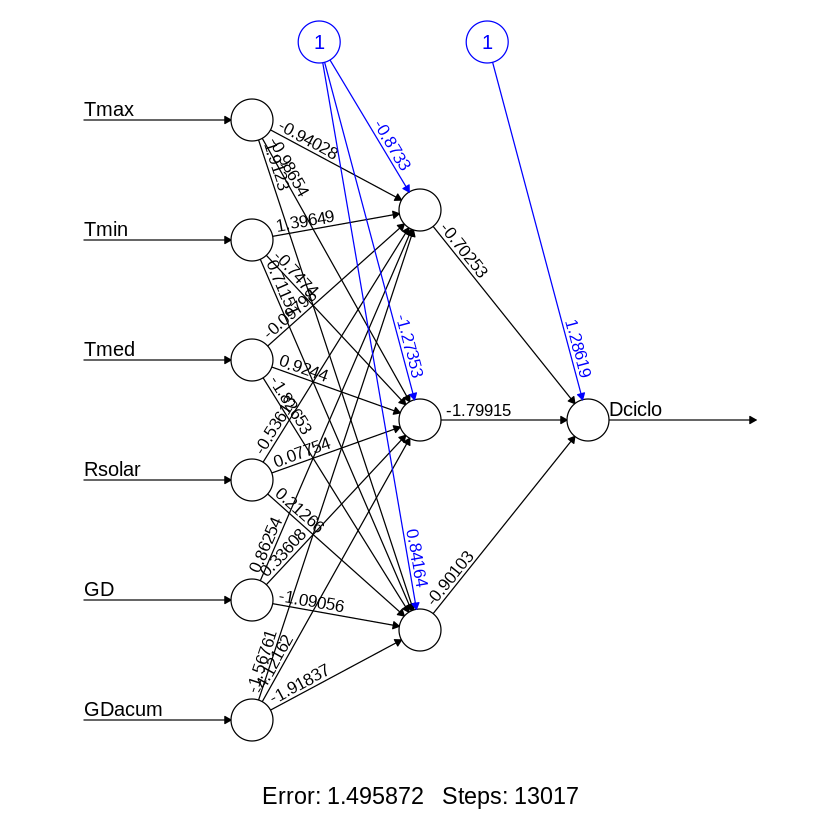

In [16]:
# Implementação do modelo com a função sigmoid
  # RNA MLP; 1 camada interna; 3 neurônios internos; função de ativação sigmóide
set.seed(123)
nn_sig <- neuralnet(Dciclo~Tmax+Tmin+Tmed+Rsolar+GD+GDacum,data=cbind(x_train, y_train), 
              hidden=3, act.fct = sigmoid,
              linear.output = TRUE)
plot(nn_sig, rep="best")

In [18]:
# Previsão modelo nn_sig
previsao_nn_sig <- compute(nn_sig, x_test)
pr_nn_sig <- previsao_nn_sig$net.result*(max(dados_input$Dciclo)-min(dados_input$Dciclo))+min(dados_input$Dciclo) #voltando para a escala normal -> resultado da previsão
test.r <- y_test*(max(dados_input$Dciclo)-min(dados_input$Dciclo))+min(dados_input$Dciclo) #voltando p/ a escala normal -> dados de teste

In [19]:
# Criação dataframe dos resultados do modelo nn_sig (RNA com função sigmoid)
resultados_nn_sig <- data.frame(test.r, pr_nn_sig)
resultados_nn_sig

Dciclo,pr_nn_sig
<dbl>,<dbl>
272.3375,259.4070
278.4125,265.0397
280.4375,267.5487
282.4625,267.3448
284.4875,265.7377
289.5500,272.2254
290.5625,273.1797
300.6875,286.2047
302.7125,285.8786


In [21]:
# Instalação da biblioteca para calcular as métricas de desempenho do modelo
install.packages("Metrics")
library (Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
#métricas da previsão com o modelo nn_sig
  # RNA MLP; 1 camada interna; 3 neurônios internos; função de ativação sigmóide
  
#MSE
MSE_nn_sig <- mse(resultados_nn_sig$Dciclo, resultados_nn_sig$pr_nn_sig)

#RMSE
RMSE_nn_sig <- rmse(resultados_nn_sig$Dciclo, resultados_nn_sig$pr_nn_sig)

#MAE
MAE_nn_sig <- mae(resultados_nn_sig$Dciclo, resultados_nn_sig$pr_nn_sig)

print(paste(MSE_nn_sig, RMSE_nn_sig, MAE_nn_sig))

[1] "61.2231731360395 7.82452382807027 6.27404627088331"


In [ ]:
################################################################################################

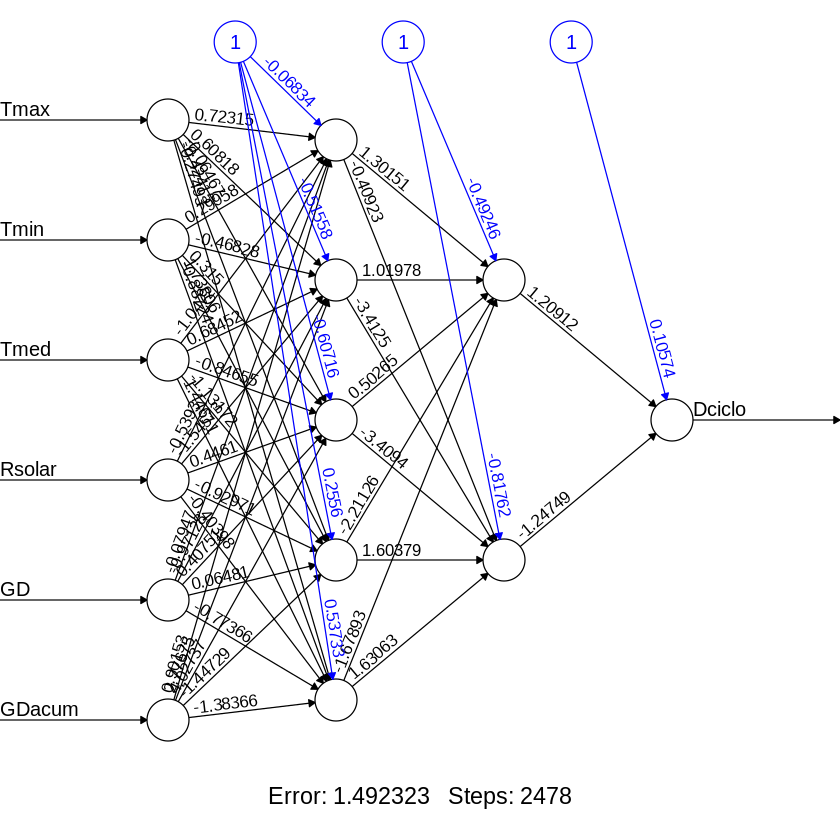

In [23]:
#implementação do modelo com a função sigmoid
  # RNA MLP; 2 camadas interna; 5,2 neurônios internos; função de ativação sigmóide
set.seed(123)
nn_sig2 <- neuralnet(Dciclo~Tmax+Tmin+Tmed+Rsolar+GD+GDacum,data=cbind(x_train, y_train), 
              hidden=c(5,2), rep=5, algorithm="rprop+",
               act.fct = sigmoid,
              linear.output = TRUE)
plot(nn_sig2, rep="best")

In [25]:
# Previsão modelo nn_sig2
previsao_nn_sig2 <- compute(nn_sig2, x_test)
pr_nn_sig2 <- previsao_nn_sig2$net.result*(max(dados_input$Dciclo)-min(dados_input$Dciclo))+min(dados_input$Dciclo) #voltando para a escala normal -> resultado da previsão
test.r <- y_test*(max(dados_input$Dciclo)-min(dados_input$Dciclo))+min(dados_input$Dciclo) #voltando p/ a escala normal -> dados de teste

# Criação dataframe dos resultados do modelo nn_sig2 
resultados_nn_sig2 <- data.frame(test.r, pr_nn_sig2)
#resultados_nn_sig2

#métricas da previsão com o modelo nn_sig2
  # RNA MLP; 2 camadas interna; 5,2 neurônios internos; função de ativação sigmóide
  
#MSE
MSE_nn_sig2 <- mse(resultados_nn_sig2$Dciclo, resultados_nn_sig2$pr_nn_sig2)

#RMSE
RMSE_nn_sig2 <- rmse(resultados_nn_sig2$Dciclo, resultados_nn_sig2$pr_nn_sig2)

#MAE
MAE_nn_sig2 <- mae(resultados_nn_sig2$Dciclo, resultados_nn_sig2$pr_nn_sig2)

print(paste(MSE_nn_sig2, RMSE_nn_sig2, MAE_nn_sig2))

[1] "62.413882838914 7.90024574547615 6.34429817135901"


In [ ]:
#####################################################################################

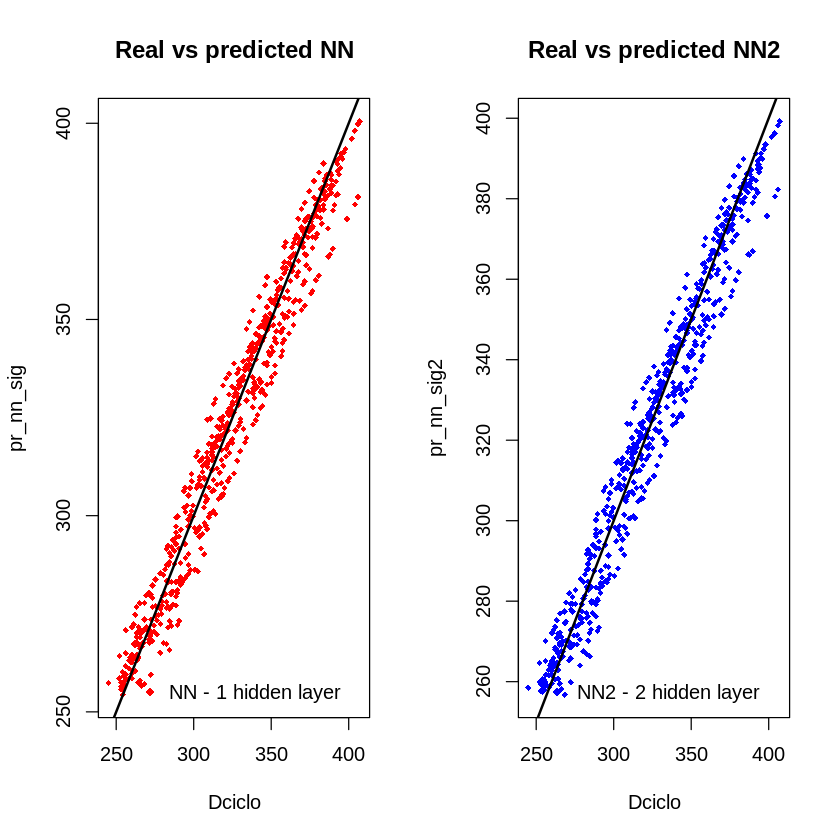

In [29]:
# Comparar graficamente modelo nn e nn2 ----- 
par(mfrow=c(1,2))

plot(resultados_nn_sig, col='red',main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN - 1 hidden layer',pch=18,col='red', bty='n')

plot(resultados_nn_sig2, col='blue',main='Real vs predicted NN2',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN2 - 2 hidden layer',pch=18,col='blue', bty='n')

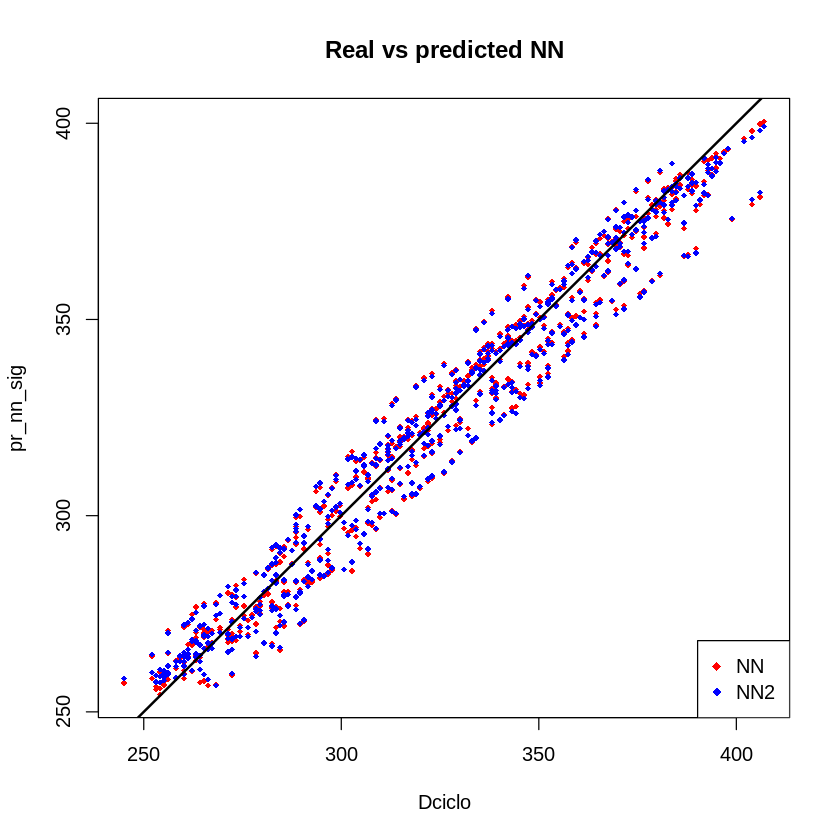

In [27]:
# Comparar graficamente------
plot(resultados_nn_sig,col='red',main='Real vs predicted NN',pch=18,cex=0.7)
points(resultados_nn_sig2,col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('NN','NN2'),pch=18,col=c('red','blue'))